In [ ]:
# ============= PREAMBLE =============
# Last Edited By: Luca Carnegie
# Date: March 28, 2025
# Description: Script that creates some visualizations of the data
# ====================================

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Read in data
df = pd.read_csv('../data/analysis_data/historic_bloom.csv')
# df = pd.read_csv('../data/analysis_data/merged_historic_modern_bloom.csv')

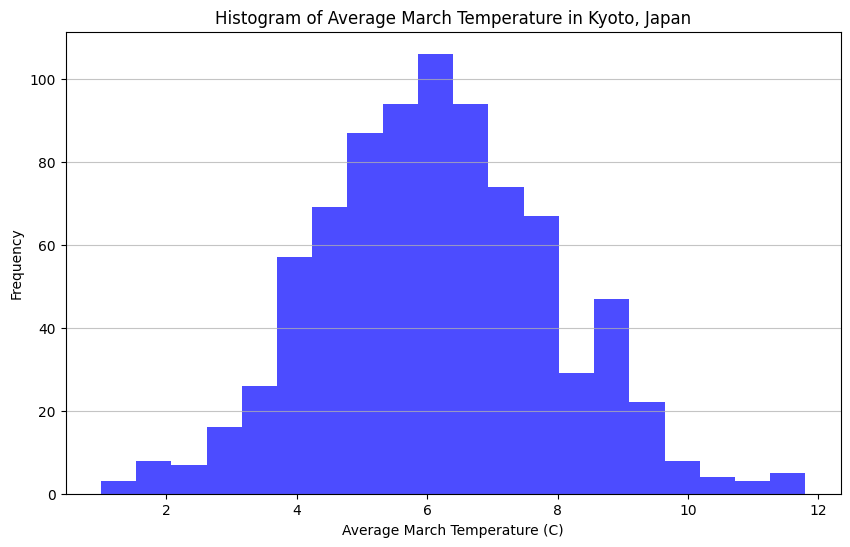

In [15]:
## AVERAGE MARCH TEMPERATURE ##

# Histogram of average march temperature

x = df['avg_temp_march_c']
plt.figure(figsize=(10, 6))
plt.hist(x, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Average March Temperature in Kyoto, Japan')
plt.xlabel('Average March Temperature (C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

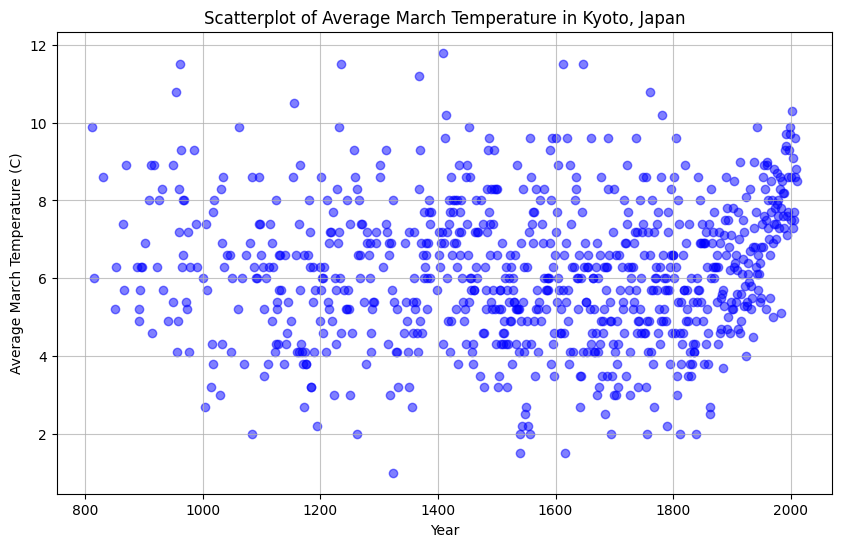

In [16]:
# Scatterplot of average temperature over the years
y = df['avg_temp_march_c']
x = df['year']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatterplot of Average March Temperature in Kyoto, Japan')
plt.xlabel('Year')
plt.ylabel('Average March Temperature (C)')
plt.grid(alpha=0.75)
plt.show()

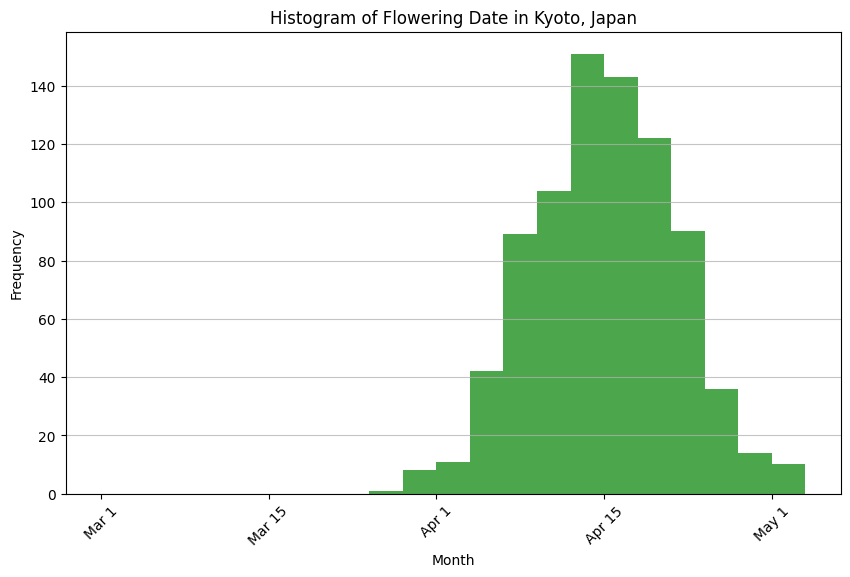

In [17]:
## FLOWERING DATE ##

# Histogram of flowering date
x = df['flower_doy']
plt.figure(figsize=(10, 6))
plt.hist(x, bins=np.arange(60, 125, 3), color='green', alpha=0.7)  # Changed bin size from 5 to 3
plt.title('Histogram of Flowering Date in Kyoto, Japan')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Convert DOY to month labels
month_ticks = [60, 75, 90, 105, 120]  # DOY values
month_labels = ['Mar 1', 'Mar 15', 'Apr 1', 'Apr 15', 'May 1']  # Corresponding month labels
plt.xticks(month_ticks, month_labels, rotation=45)
plt.show()


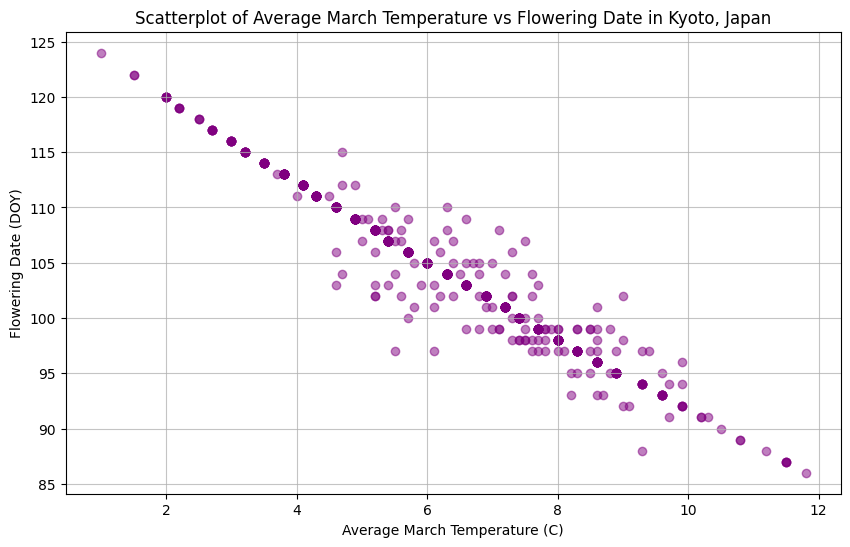

In [18]:
## Scatterplot of average temperature vs flowering date
y = df['flower_doy']
x = df['avg_temp_march_c']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', alpha=0.5)
plt.title('Scatterplot of Average March Temperature vs Flowering Date in Kyoto, Japan')
plt.xlabel('Average March Temperature (C)')
plt.ylabel('Flowering Date (DOY)')
plt.grid(alpha=0.75)
plt.show()